In [98]:
import numpy as np
from scipy.stats import chi2

# Define the rating numbers as a matrix
rating_numbers = np.array([
    [47, 45, 46],
    [18, 19, 19],
    [14, 13, 13],
    [3, 2, 3],
    [3, 4, 4],
    [3, 2, 0],
    [9, 9, 9],
    [5, 5, 5]
])

# Calculate the total number of items and categories
n_items = rating_numbers.shape[0]
n_categories = rating_numbers.shape[1]

# Calculate the observed agreement for each item
observed_agreements = []
for item_ratings in rating_numbers:
    observed_agreement = sum([count * (count - 1) for count in item_ratings]) / (n_items * (n_items - 1))
    observed_agreements.append(observed_agreement)

# Calculate the marginal probability of each category
category_frequencies = np.sum(rating_numbers, axis=0)
category_probabilities = category_frequencies / (n_items * n_categories)

# Calculate the expected agreement for each item
expected_agreements = []
for item_ratings in rating_numbers:
    expected_agreement = sum([category_probabilities[j] ** 2 for j in range(n_categories)]) 
    expected_agreements.append(expected_agreement)

# Calculate the overall observed and expected agreement
observed_agreement = sum(observed_agreements) / n_items
expected_agreement = sum(expected_agreements) / n_items

# Calculate the kappa statistic and p-value
kappa = (observed_agreement - expected_agreement) / (1 - expected_agreement)
df = n_categories - 1

# Print the result
print("Fleiss' kappa:", kappa)


Fleiss' kappa: 0.6690257754477936


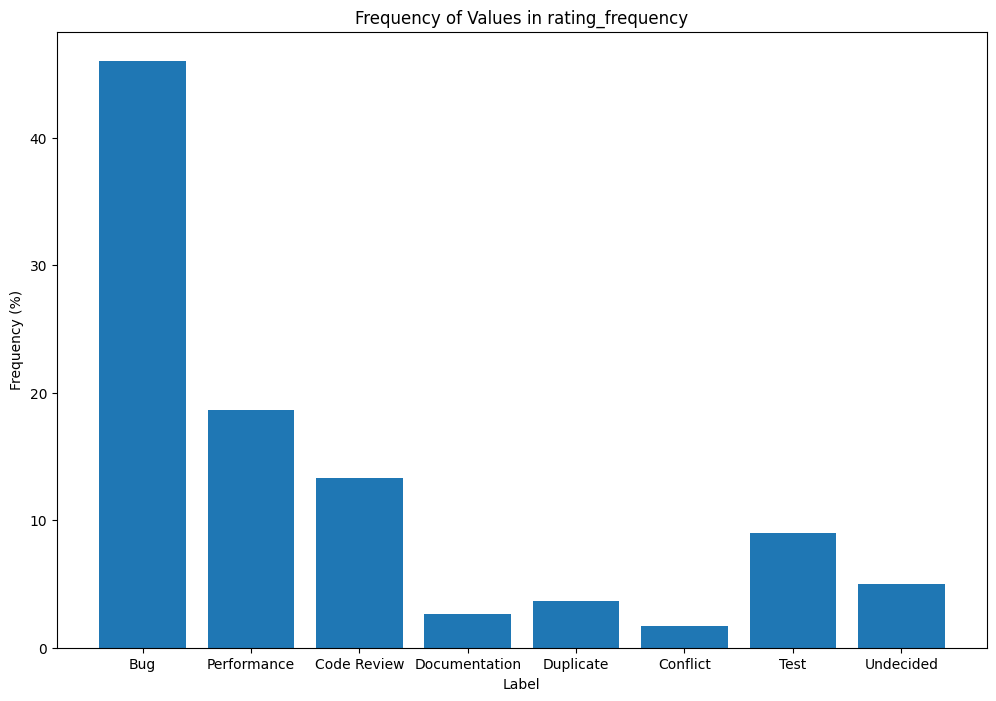

In [93]:
frequency = []
total_frequency = sum(rating_frequency)
labels = ['Bug', 'Performance', 'Code Review', 'Documentation', 'Duplicate', 'Conflict', 'Test', 'Undecided']
for i in range(len(rating_frequency)):
    frequency.append(rating_frequency[i]/total_frequency * 100)

plt.figure(figsize=(12,8))
plt.bar(labels, frequency)
plt.xlabel('Label')
plt.ylabel('Frequency (%)')
plt.title('Frequency of Values in rating_frequency')
plt.show()


In [94]:
# Print the frequency of values in rating_frequency in a table format
print('Frequency of Values in rating_frequency')
print('Label\tFrequency (%)')
for i in range(len(labels)):
    print(labels[i], '\t', frequency[i])
    

Frequency of Values in rating_frequency
Label	Frequency (%)
Bug 	 46.0
Performance 	 18.666666666666668
Code Review 	 13.333333333333334
Documentation 	 2.666666666666667
Duplicate 	 3.6666666666666665
Conflict 	 1.6666666666666667
Test 	 9.0
Undecided 	 5.0
